<center><span style="color:gray";><h1><b>Commute and Intersections Metric</b></h1></span></center>


I created multiple indicators which I used to rank the neighborhoods by using:
<ul style="padding-left: 40px;">
    <ul style="padding-left: 40px;">
    <li>The population per neighborhood</li>
    <br>
    <li>The amount of intersections per neighborhood</li>
    <br>
    <li>The street density and miles of road per neighborhood</li>
    <br>
    <li>The % of people who commute alone by car per neighborhood</li>
    <br>
    <li>The % of people who Carpool/Vanpool per neighborhood</li>
    <br>
    <li>The % of people who commute via motorcycle per neighborhood</li>
    <br>
    <li>The % of people who commute via public transportation per neighborhood</li>
    <br>
    <li>The % of people who commute via taxi per neighborhood</li>
    <br>
    <li>The % of people who commute via bicycle per neighborhood</li>
    <br>
    <li>The % of people who commute by walking per neighborhood</li>
</ul>


We can rearrange the street density to calculate the area of each neighborhood.

Then we can take the population and divide it by the calculated area to get population density.
 [Population (2010)]/([Total Street Miles]/[Density (st. mi/area mi^2)]) =

 [(st. mi/area mi^2)]*[Population (2010)]/[Total Street Miles] =
 
 [Population (2010)] / (area mi^2)

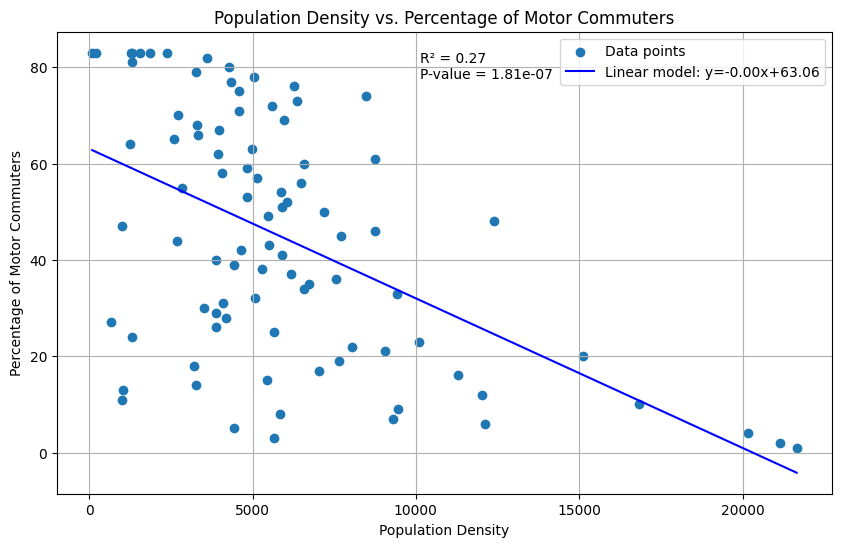

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

# Removing rows with NaN values for accurate statistical analysis
useful_data.dropna(subset=[
    'Population (2010)', 'Total Street Miles', 'Density (st. mi/area mi^2)', 'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)', 
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Public Transportation (2010)', 'Commute to Work: Taxi (2010)'], inplace=True)

# Calculating x as [Population (2010)]/([Total Street Miles]/[Density (st. mi/area mi^2)])
x = useful_data['Population (2010)'] / (useful_data['Total Street Miles'] / useful_data['Density (st. mi/area mi^2)'])

# Calculating y as the sum of various commute methods
y = (useful_data['Drive Alone (2010)'] + useful_data['Commute to Work: Carpool/Vanpool (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] +
     useful_data['Commute to Work: Public Transportation (2010)'] + useful_data['Commute to Work: Taxi (2010)']).rank(method='min')


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data points')
plt.title('Population Density vs. Percentage of Motor Commuters')
plt.xlabel('Population Density')
plt.ylabel('Percentage of Motor Commuters')

# Adding a linear trend line
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, intercept + slope*x_range, 'blue', label=f'Linear model: y={slope:.2f}x+{intercept:.2f}')

# Annotating with R² and P value for the linear model
plt.annotate(f'R² = {r_value**2:.2f}\nP-value = {p_value:.2e}', xy=(0.4685, 0.9575), xycoords='axes fraction', fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()


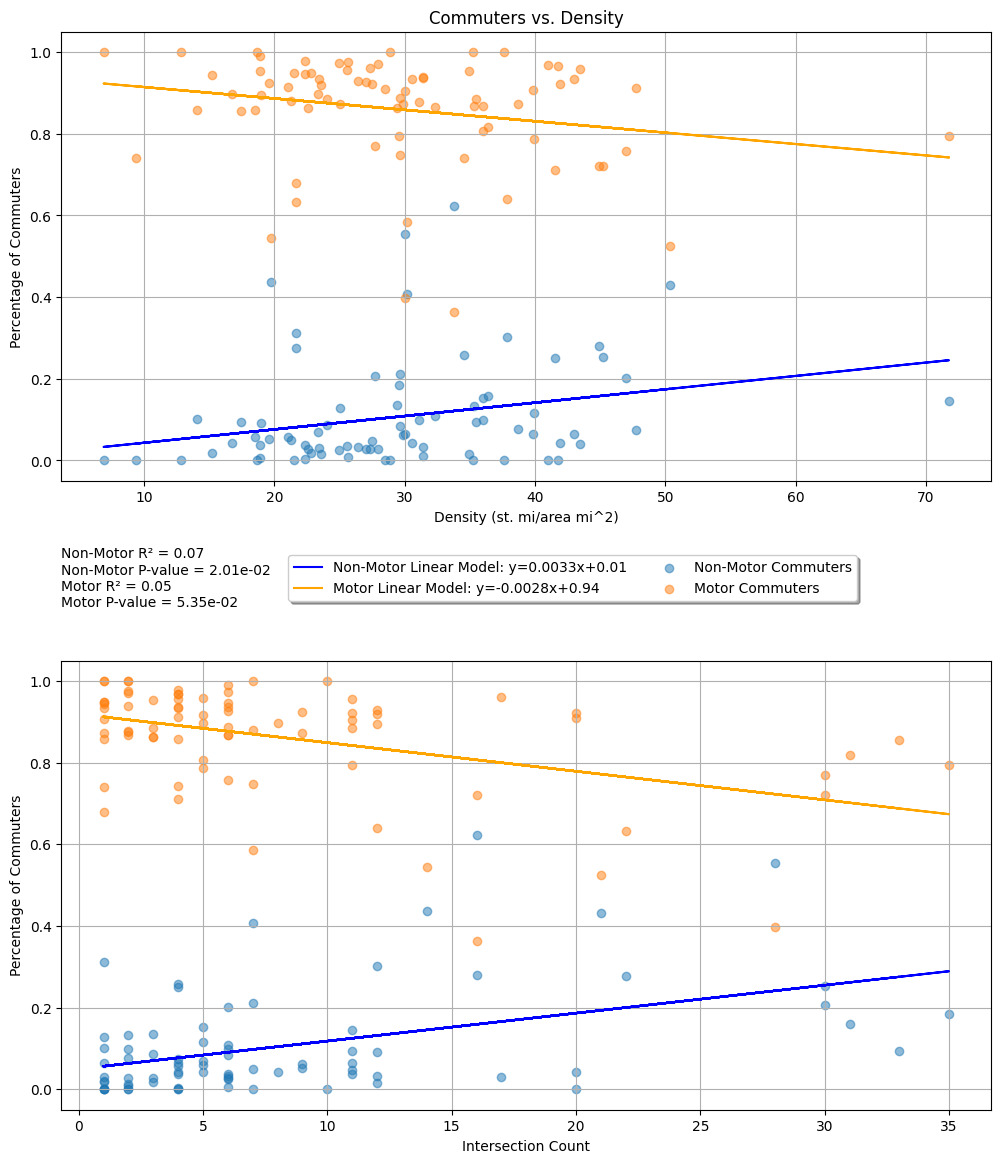

In [27]:

# Load the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

#Ensures no NaN values skew the results
useful_data.dropna(subset=['Density (st. mi/area mi^2)', 'Intersection Count', 'Commute to Work: Bicycle (2010)', 'Commute to Work: Walk (2010)','Commute to Work: Motorcycle (2010)',
                           'Commute to Work: Carpool/Vanpool (2010)', 'Commute to Work: Public Transportation (2010)', 'Drive Alone (2010)'], inplace=True)

# Calculate the sum for non-motor and motor commuters
non_motor_commuters = useful_data['Commute to Work: Bicycle (2010)'] + useful_data['Commute to Work: Walk (2010)']

motor_commuters = (useful_data['Commute to Work: Taxi (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] + useful_data['Commute to Work: Carpool/Vanpool (2010)'] +
                   useful_data['Commute to Work: Public Transportation (2010)'] + useful_data['Drive Alone (2010)'])


fig, ax = plt.subplots(2, 1, figsize=(12, 14))

x1 = useful_data['Density (st. mi/area mi^2)']
slope_1, intercept_1, r_value1, p_value1, std_err1 = stats.linregress(x1, non_motor_commuters)
slope_2, intercept_2, r_value2, p_value2, std_err2 = stats.linregress(x1, motor_commuters)

# Plotting the lines
ax[0].plot(x1, intercept_1 + slope_1 * x1, 'b', label='Non-Motor Linear Model: y={:.4f}x+{:.2f}'.format(slope_1, intercept_1))
ax[0].plot(x1, intercept_2 + slope_2 * x1, 'orange', label='Motor Linear Model: y={:.4f}x+{:.2f}'.format(slope_2, intercept_2))
ax[0].scatter(x1, non_motor_commuters, alpha=0.5, label='Non-Motor Commuters')
ax[0].scatter(x1, motor_commuters, alpha=0.5, label='Motor Commuters')

fig.text(0.125, 0.4695, f'Non-Motor R² = {r_value1**2:.2f}\nNon-Motor P-value = {p_value1:.2e}\n'
                    f'Motor R² = {r_value2**2:.2f}\nMotor P-value = {p_value2:.2e}', fontsize=10)

ax[0].set_title('Commuters vs. Density')
ax[0].set_xlabel('Density (st. mi/area mi^2)')
ax[0].set_ylabel('Percentage of Commuters')
ax[1].set_xlabel('Intersection Count')
ax[1].set_ylabel('Percentage of Commuters')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.55, -0.15), fancybox=True, shadow=True, ncol=2)
ax[0].grid(True)
plt.subplots_adjust(hspace=0.6)


x2 = useful_data['Intersection Count']

slope_3, intercept_3, r_value3, p_value3, std_err3 = stats.linregress(x2, non_motor_commuters)

slope_4, intercept_4, r_value4, p_value4, std_err4 = stats.linregress(x2, motor_commuters)


ax[1].scatter(x2, non_motor_commuters, alpha=0.5, label='Non-Motor Commuters')
ax[1].scatter(x2, motor_commuters, alpha=0.5, label='Motor Commuters')
ax[1].plot(x2, intercept_3 + slope_3 * x2, 'b', label='Non-Motor Linear Model: y={:.4f}x+{:.2f}'.format(slope_3, intercept_3))
ax[1].plot(x2, intercept_4 + slope_4 * x2, 'orange', label='Motor Linear Model: y={:.4f}x+{:.2f}'.format(slope_4, intercept_4))

ax[1].grid(True)

#Prevents overlapping text and graph
plt.subplots_adjust(hspace=0.4)  

# Display both graphs
plt.show()


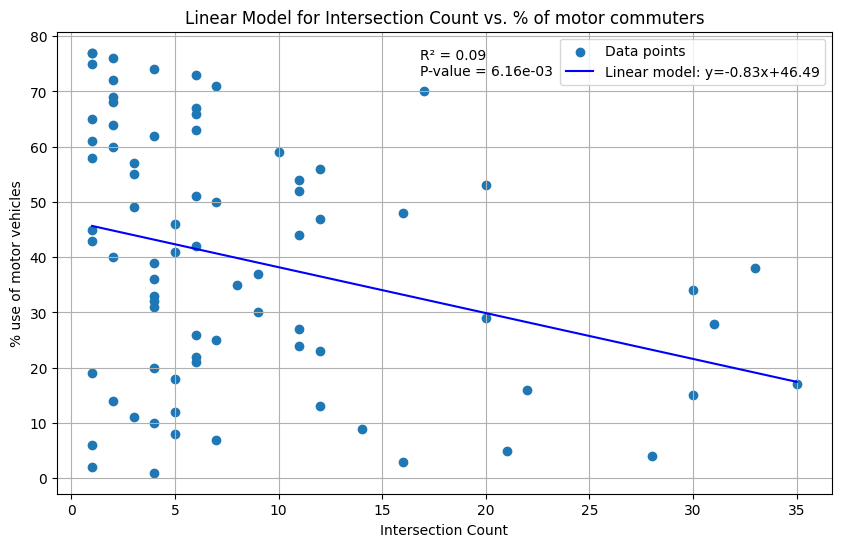

In [13]:


# Load the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

# Removing rows with NaN values for accurate statistical analysis
useful_data.dropna(subset=['Intersection Count', 'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)', 'Commute to Work: Motorcycle (2010)'], inplace=True)

x = useful_data['Intersection Count']
y = (useful_data['Drive Alone (2010)']+useful_data['Commute to Work: Carpool/Vanpool (2010)']+useful_data['Commute to Work: Motorcycle (2010)']+useful_data['Commute to Work: Taxi (2010)']).rank(method='min')


# Calculate the linear regression on the data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Creating a scatter plot with the original data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data points')
plt.title('Linear Model for Intersection Count vs. % of motor commuters')
plt.xlabel('Intersection Count')
plt.ylabel('% use of motor vehicles')

# Adding a linear trend line
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, intercept + slope*x_range, 'blue', label=f'Linear model: y={slope:.2f}x+{intercept:.2f}')

# Annotating with R² and P value for the linear model
plt.annotate(f'R² = {r_value**2:.2f}\nP-value = {p_value:.2e}',
             xy=(0.4685, 0.965), xycoords='axes fraction',
             fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()


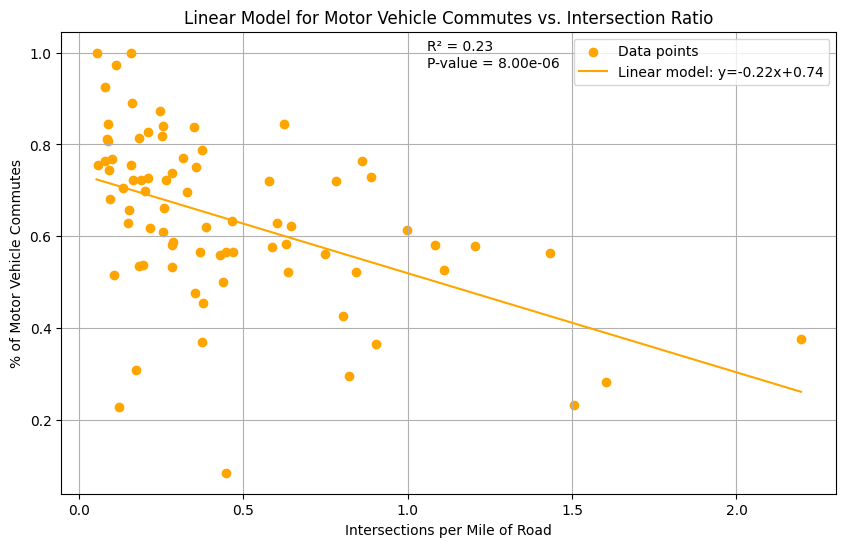

In [16]:


# Load the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

# Removing rows with NaN values for accurate statistical analysis
useful_data.dropna(subset=[
    'Intersection Count', 'Miles of Major Roads', 'Total Street Miles',
    'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)',
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Taxi (2010)'
], inplace=True)


y = (useful_data['Commute to Work: Taxi (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] +
     useful_data['Commute to Work: Carpool/Vanpool (2010)'] + useful_data['Drive Alone (2010)'])

# Update x to be the ratio of 'Intersection Count' to the sum of 'Miles of Major Roads' and 'Total Street Miles'
x = useful_data['Intersection Count'] / (useful_data['Miles of Major Roads'] + useful_data['Total Street Miles'])

# Calculate the linear regression on the data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Creating a scatter plot with the original data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='orange', label='Data points')  # Color added here as well for consistency
plt.title('Linear Model for Motor Vehicle Commutes vs. Intersection Ratio')
plt.xlabel('Intersections per Mile of Road')
plt.ylabel('% of Motor Vehicle Commutes')

# Adding a linear trend line
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, intercept + slope*x_range, 'orange', label=f'Linear model: y={slope:.2f}x+{intercept:.2f}')  # Color changed to green

# Annotating with R² and P value for the linear model
plt.annotate(f'R² = {r_value**2:.2f}\nP-value = {p_value:.2e}',
             xy=(0.4725, 0.9825), xycoords='axes fraction',
             fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Load the dataset
file_path = "Useful_Data.csv"
df = pd.read_csv(file_path)

# Rank neighborhoods based on each metric
# For Density, Drive Alone, Carpool/Vanpool, and Motorcycle (lower is better)
df
df['Intersection_Count'] = df['Intersection Count']
df['Intersection_Rank']=df['Intersection_Count'].rank(method='min', ascending=False)
df['Rank_Density'] = df['Density (st. mi/area mi^2)'].rank(method='min', ascending=False)
#df['Count_Density'] = df['Count/Density'].rank(method='min')
df['Rank_Drive_Alone'] = df['Drive Alone (2010)']
df['Carpool_Vanpool'] = df['Commute to Work: Carpool/Vanpool (2010)']
df['Motorcycle'] = df['Commute to Work: Motorcycle (2010)']
df['Rank_Car_Van'] = (df['Drive Alone (2010)']+df['Commute to Work: Carpool/Vanpool (2010)']+df['Motorcycle']).rank(method='min')
df['Intersection_Ratio_Rank']=(df['Intersection Count'] / (df['Miles of Major Roads'] + df['Total Street Miles'])).rank(method='min', ascending=False)
df['Population_density'] = (df['Population (2010)'] / (df['Total Street Miles'] / df['Density (st. mi/area mi^2)'])).rank(method='min', ascending=True)

# For Public Transportation, Bicycle, and Walk (lower is better)
df['Rank_Public_Transportation'] = df['Commute to Work: Public Transportation (2010)'].rank(method='min', ascending=True)
df['Rank_Bicycle'] = df['Commute to Work: Bicycle (2010)'].rank(method='min', ascending=False)

# Calculate the eighth ranking by summing up all ranks and name it 'total_rank'
df['total_rank'] = df[['Intersection_Rank', 'Intersection_Rank', 'Rank_Density', 'Rank_Car_Van', 'Intersection_Ratio_Rank','Rank_Public_Transportation', 'Rank_Bicycle', 'Population_density']].sum(axis=1)

# Exclude rows with NaN values
df_clean = df.dropna()

# Sort by 'total_rank'
df_sorted = df_clean.sort_values(by='total_rank')

# Rearrange columns
columns_ordered = ['Neighborhood', 'total_rank', 'Intersection_Rank', 'Rank_Density', 'Rank_Public_Transportation', 'Intersection_Ratio_Rank', 'Rank_Bicycle', 'Population_density']
df_final = df_sorted[columns_ordered]

# Add a column for sequence number
df_final.reset_index(drop=True, inplace=True)
df_final.index += 1

# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 1000)        # Set display width to prevent wrapping
pd.set_option('display.colheader_justify', 'center')  # Center the column headers

# Display the final rankings along with all individual rankings
display(df_final)


,Neighborhood,total_rank,Intersection_Rank,Rank_Density,Rank_Public_Transportation,Intersection_Ratio_Rank,Rank_Bicycle,Population_density
1,North Shore,133.0,12.0,7.0,1.0,15.0,26.0,5.0
2,North Oakland,168.0,6.0,37.0,15.0,2.0,8.0,89.0
3,Bloomfield,178.0,4.0,6.0,48.0,12.0,2.0,83.0
4,South Oakland,197.0,15.0,17.0,25.0,28.0,26.0,55.0
5,Central Oakland,198.0,12.0,29.0,22.0,3.0,26.0,90.0
6,Bluff,206.0,8.0,2.0,55.0,13.0,26.0,88.0
7,Strip District,209.0,9.0,46.0,44.0,10.0,26.0,6.0
8,Allegheny Center,216.0,14.0,73.0,39.0,1.0,26.0,38.0
9,South Side Flats,218.0,4.0,48.0,33.0,8.0,16.0,68.0
10,Homewood South,225.0,9.0,10.0,74.0,7.0,26.0,57.0
